<a href="https://colab.research.google.com/github/Vidhzzi/CODSOFT/blob/main/SalesDAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# STEP 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [8]:
# STEP 1: Load the Datasets
orders = pd.read_csv('/content/Orders.csv')
details = pd.read_csv('/content/Details.csv')

In [9]:
# STEP 2: Merge Datasets on 'Order ID'
merged_df = pd.merge(details, orders, on='Order ID', how='left')

In [10]:
# STEP 3: Data Cleaning
# Convert 'Order Date' to datetime
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%d-%m-%Y')

In [11]:
# Check for missing values
print("Missing Values:\n", merged_df.isnull().sum())

Missing Values:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


In [12]:
# Drop duplicates if any
merged_df.drop_duplicates(inplace=True)


In [13]:
print("Data Cleaning Done.\n")

Data Cleaning Done.



<ipython-input-14-081b0ef7d674>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Amount', data=merged_df, estimator=sum, ci=None, palette="Set2")
<ipython-input-14-081b0ef7d674>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Amount', data=merged_df, estimator=sum, ci=None, palette="Set2")


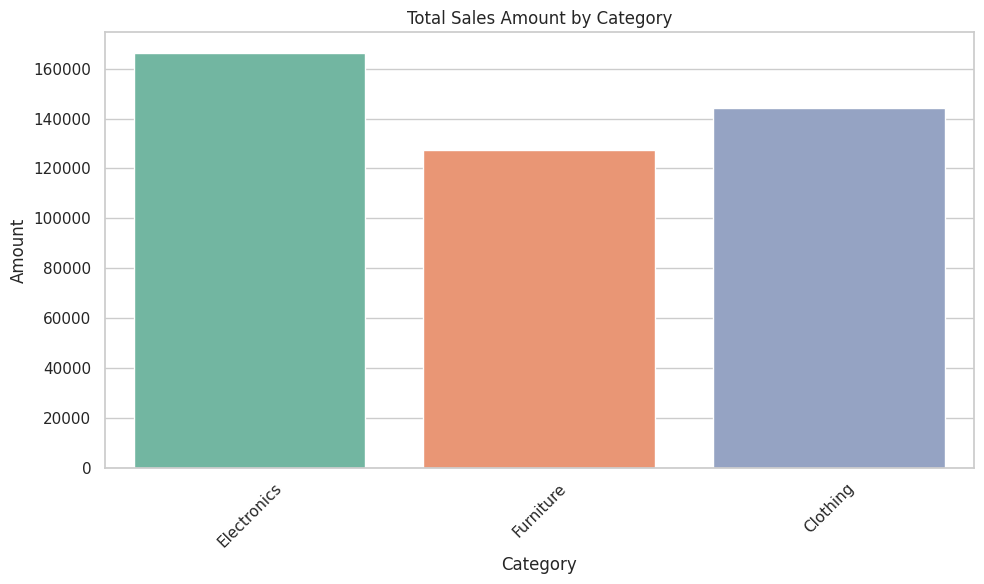

In [14]:
# STEP 4: Data Visualization

sns.set(style="whitegrid")

# 4A: Total Sales Amount by Category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Amount', data=merged_df, estimator=sum, ci=None, palette="Set2")
plt.title('Total Sales Amount by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

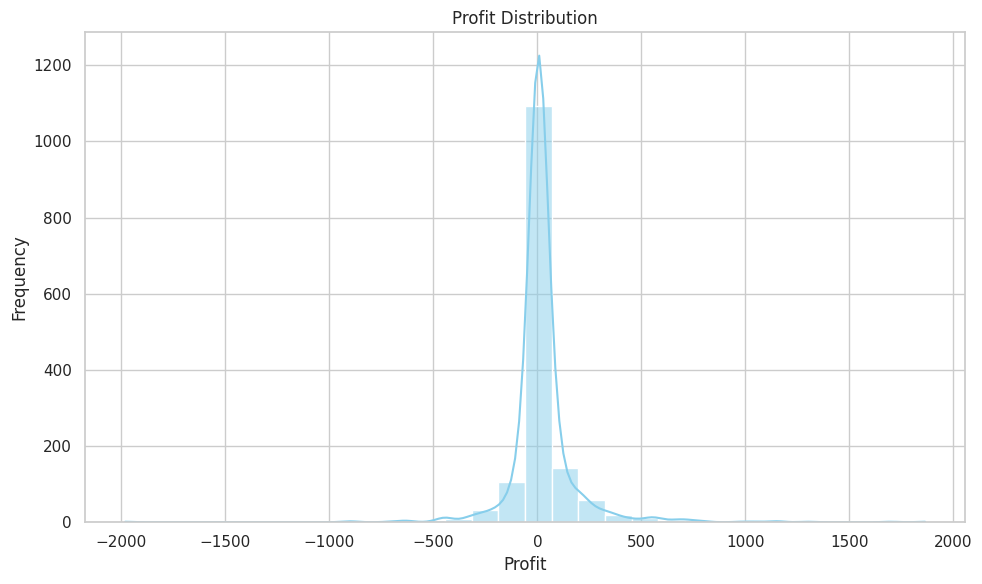

In [15]:
# 4B: Profit Distribution
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Profit'], bins=30, kde=True, color='skyblue')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-16-5b43ef1e3cc8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='PaymentMode', data=merged_df, order=merged_df['PaymentMode'].value_counts().index, palette="pastel")


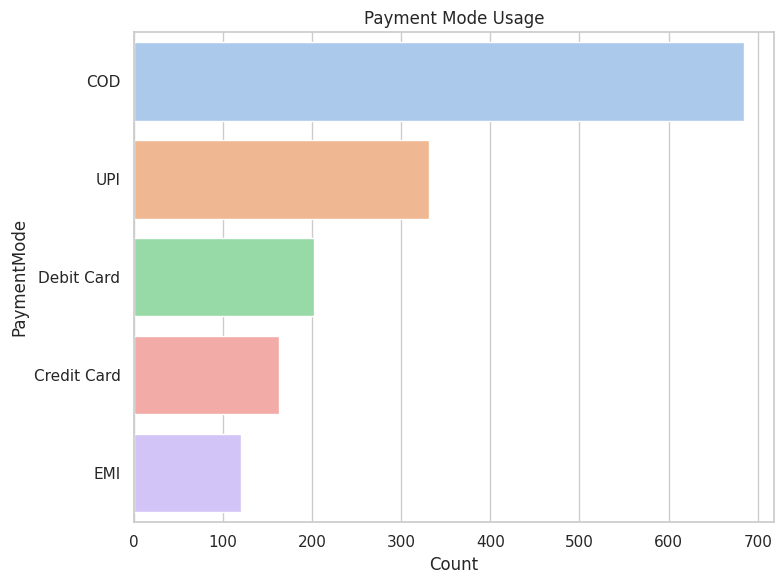

In [16]:
# 4C: Payment Mode Usage
plt.figure(figsize=(8,6))
sns.countplot(y='PaymentMode', data=merged_df, order=merged_df['PaymentMode'].value_counts().index, palette="pastel")
plt.title('Payment Mode Usage')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-17-3f0f1d52db8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


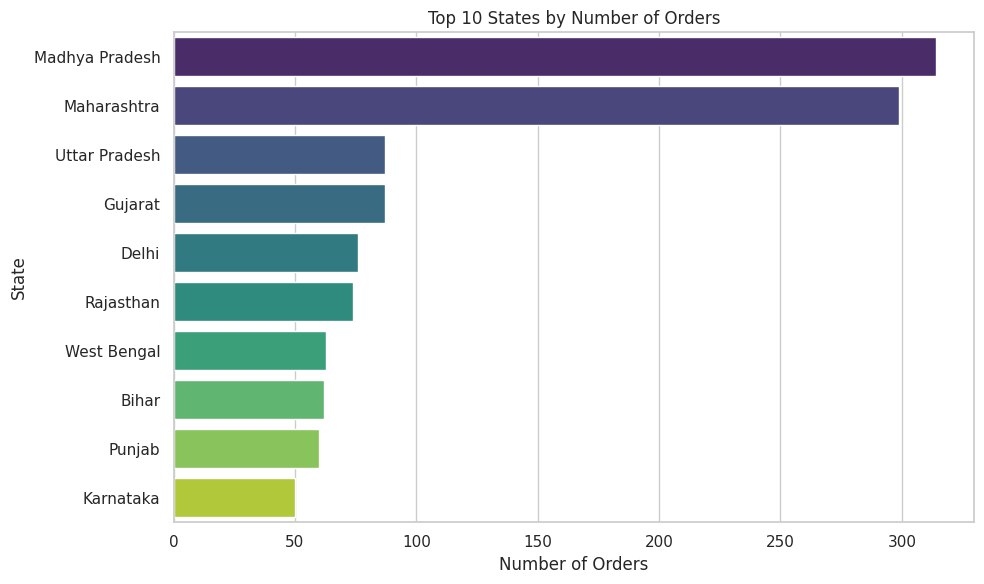

In [17]:
# 4D: Top 10 States by Orders
top_states = merged_df['State'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title('Top 10 States by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.tight_layout()
plt.show()

<ipython-input-18-6dcc18b71383>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette="coolwarm")


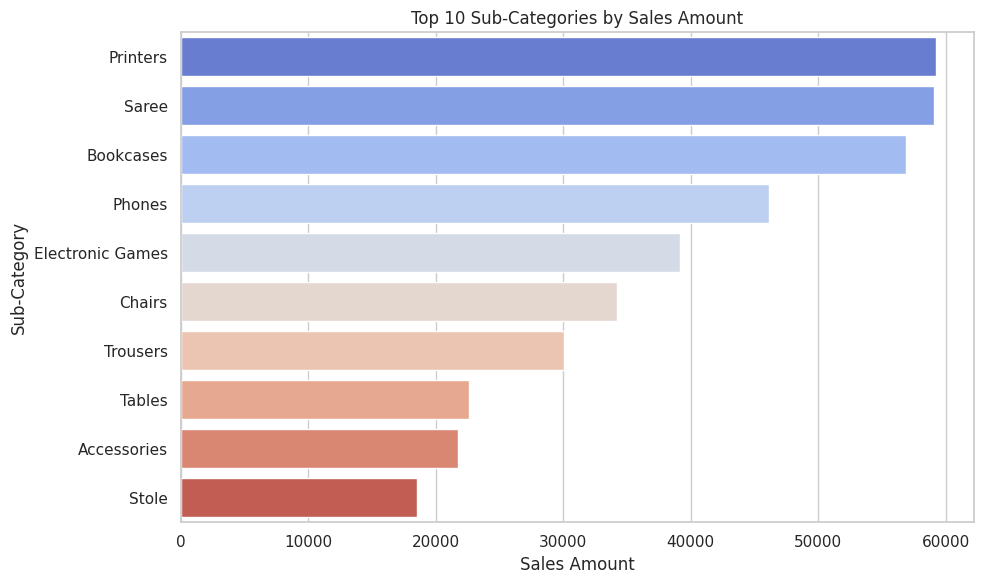

In [18]:
# 4E: Top 10 Sub-Categories by Sales
top_subcategories = merged_df.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette="coolwarm")
plt.title('Top 10 Sub-Categories by Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

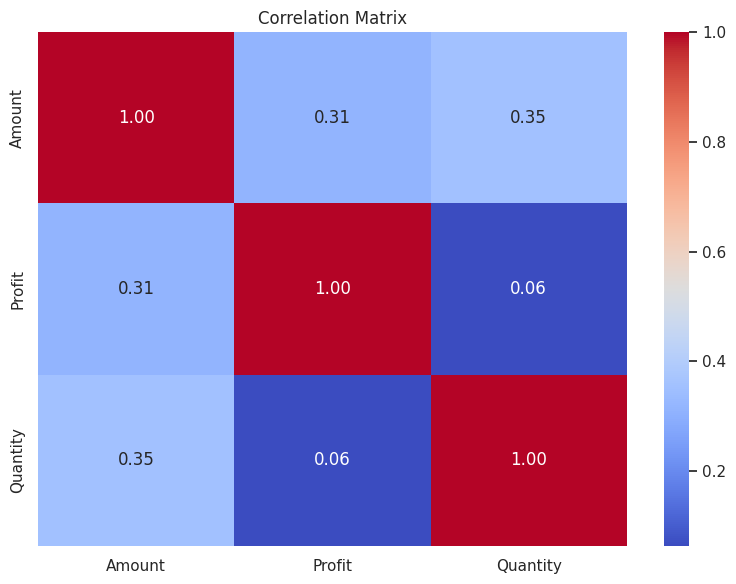

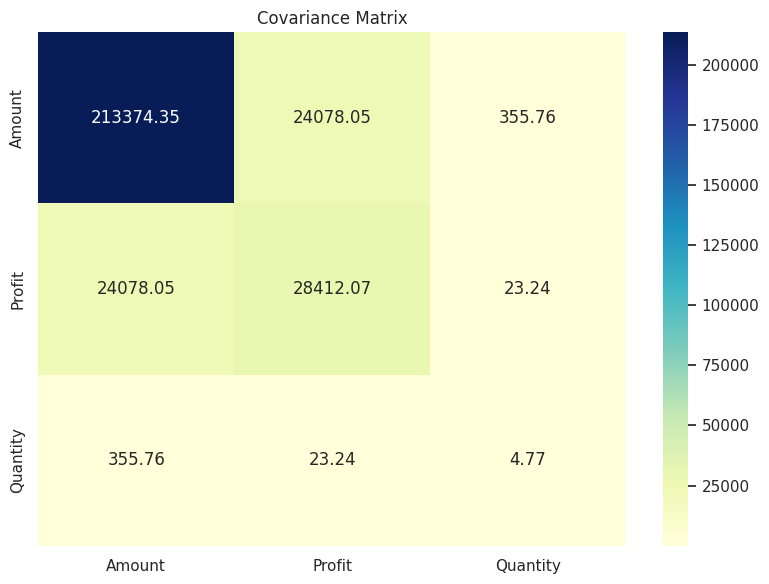

In [19]:
# STEP 5: Correlation and Covariance

# 5A: Correlation Matrix
corr_matrix = merged_df[['Amount', 'Profit', 'Quantity']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 5B: Covariance Matrix
cov_matrix = merged_df[['Amount', 'Profit', 'Quantity']].cov()
plt.figure(figsize=(8,6))
sns.heatmap(cov_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

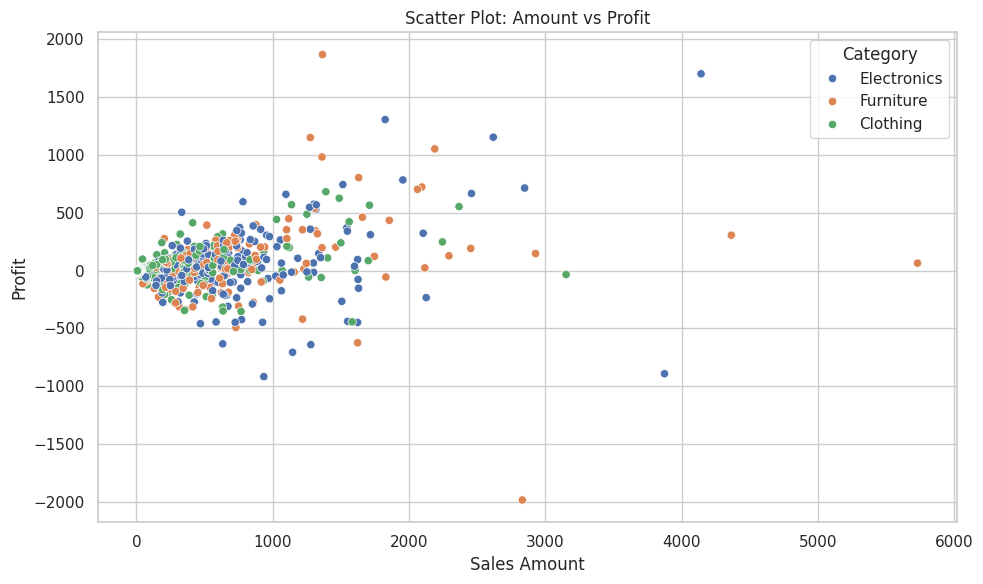

In [26]:
# Scatter Plot: Amount vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Amount', y='Profit', data=merged_df, hue='Category', palette='deep')
plt.title('Scatter Plot: Amount vs Profit')
plt.xlabel('Sales Amount')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [20]:
# STEP 6: Hypothesis Testing

# H0: Mean Profit = 0
# H1: Mean Profit ≠ 0
t_stat, p_value = stats.ttest_1samp(merged_df['Profit'], 0)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Mean profit is significantly different from 0.\n")
else:
    print("Fail to reject the null hypothesis: Mean profit is not significantly different from 0.\n")

T-statistic: 5.662
P-value: 0.00000
Reject the null hypothesis: Mean profit is significantly different from 0.



In [21]:
# STEP 7: Simple Linear Regression

# Predict Profit based on Amount
X_simple = merged_df[['Amount']]
y = merged_df['Profit']

simple_model = LinearRegression()
simple_model.fit(X_simple, y)

print("Simple Linear Regression Results:")
print(f"Coefficient (Slope): {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"R-squared: {simple_model.score(X_simple, y):.4f}\n")

Simple Linear Regression Results:
Coefficient (Slope): 0.1128
Intercept: -8.2913
R-squared: 0.0956



In [24]:
#STEP 8: Multiple Linear Regression

# Predict Profit based on Amount and Quantity
X_multiple = merged_df[['Amount', 'Quantity']]

multiple_model = LinearRegression()
multiple_model.fit(X_multiple, y)

print("Multiple Linear Regression Results:")
print(f"Coefficients: Amount = {multiple_model.coef_[0]:.4f}, Quantity = {multiple_model.coef_[1]:.4f}")
print(f"Intercept: {multiple_model.intercept_:.4f}")
print(f"R-squared: {multiple_model.score(X_multiple, y):.4f}\n")

Multiple Linear Regression Results:
Coefficients: Amount = 0.1196, Quantity = -4.0441
Intercept: 4.8792
R-squared: 0.0980



In [25]:
# STEP 9: Export Cleaned Data for Dashboard
merged_df.to_csv('/content/cleaned_data.csv', index=False)
print("Cleaned data exported as 'cleaned_data.csv' ready for Power BI or dashboard creation.")

Cleaned data exported as 'cleaned_data.csv' ready for Power BI or dashboard creation.
